In [73]:
# Panda
import pandas as pd

In [74]:
data = pd.read_csv("onlinefood/onlinefoods.csv")
data.drop(columns=['Unnamed: 12'],inplace=True)
data.dropna(inplace=True)
data.head()
max = 1000

In [75]:
sliced_x = data.iloc[:max,0:7].join(data.iloc[:max,10:11])
sliced_x.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output
0,20,Female,Single,Student,No Income,Post Graduate,4,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Yes
3,22,Female,Single,Student,No Income,Graduate,6,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Yes


In [76]:
sliced_y = data.iloc[:max,11:12]
sliced_y.head()

,Feedback
0,Positive
1,Positive
2,Negative
3,Positive
4,Positive


In [77]:
from sklearn.preprocessing import LabelEncoder
x = ['Gender','Marital Status','Occupation','Monthly Income','Educational Qualifications','Output']
encode = LabelEncoder()
for col in x:
    sliced_x[col] = encode.fit_transform(sliced_x[col])

sliced_y = encode.fit_transform(sliced_y)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(sliced_x,sliced_y,test_size=0.3)

In [79]:
from sklearn import linear_model
linearClassifier = linear_model.LinearRegression()
linearClassifier.fit(x_train,y_train)

LinearRegression()

In [80]:
# Prediction
linearResult = linearClassifier.predict(x_test)
print(f"Linear Result : {linearResult}")

Linear Result : [0.85062938 0.98004494 0.45127551 0.95399022 0.96987346 0.93741097
 0.88119711 0.90922571 0.89502512 0.93725328 0.90922571 0.44591079
 0.96792601 0.95755348 0.99383591 1.02330907 0.3457782  0.39080758
 0.40081127 0.37696868 0.95480114 0.97616209 0.92078113 0.91733792
 0.95730747 0.99621838 0.42225901 0.96138051 0.36819768 0.85782356
 0.94693494 0.98108091 0.91507931 0.93097257 0.33708123 0.95968994
 0.96594935 0.98665677 0.38588445 0.9225767  0.87826882 0.86793443
 0.91269684 0.95726141 0.38990907 1.02807401 0.99621838 0.96356688
 0.44979178 0.95755348 0.38680037 0.41522301 0.93198294 1.03154514
 0.98321737 0.95464295 0.99383591 0.95309837 0.96222629 0.35535486
 0.95160775 0.30162851 0.89578285 0.85062938 0.40081127 0.93365618
 0.97522731 0.9318102  0.99827882 0.99919685 0.95883985 0.30162851
 1.00747898 0.39520055 0.91269894 0.90129355 0.99860085 0.87019094
 0.85782356 0.86780847 0.35697773 0.87170827 0.99621838 0.87378803
 1.01269053 0.92719824 0.89578285 1.03800065 1

In [81]:
# Logistic
logisticClassifier = linear_model.LogisticRegression()
logisticClassifier.fit(x_train,y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
logisticResult = logisticClassifier.predict(x_test)
print(f"Logistic Result: {logisticResult}")

Logistic Result: [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1]


In [83]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [84]:
logisticAccuracy = accuracy_score(logisticResult,y_test)
print(f"Logistic Accuracy: {logisticAccuracy}")

Logistic Accuracy: 0.8376068376068376


In [85]:
logisticPrecision = precision_score(logisticResult,y_test)
print(f"Logistic Precision: {logisticPrecision}")

Logistic Precision: 0.9230769230769231


In [86]:
logisticRecall = recall_score(logisticResult,y_test)
print(f"Logistic Recall: {logisticRecall}")

Logistic Recall: 0.875


In [87]:
logisticF1 = f1_score(logisticResult,y_test)
print(f"Logistic F1: {logisticF1}")

Logistic F1: 0.8983957219251337


In [88]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=5)
knnClassifier.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
knnResult = knnClassifier.predict(x_test)

In [90]:
knnAccuracy = accuracy_score(knnResult,y_test)
print(f"KNN Accuracy: {knnAccuracy}")

KNN Accuracy: 0.8034188034188035


In [91]:
knnPrecision = precision_score(knnResult,y_test)
print(f"Precision : {knnPrecision}")

Precision : 0.9560439560439561


In [92]:
knnRecall = recall_score(knnResult,y_test)
print(f"Recall: {knnRecall}")

Recall: 0.8207547169811321


In [93]:
knnF1 = f1_score(knnResult,y_test)
print(f"F1: {knnF1}")

F1: 0.883248730964467


In [94]:
#SVC
from sklearn.svm import SVC

In [95]:
svcClassifier = SVC(kernel='linear')
svcClassifier.fit(x_train,y_train)

SVC(kernel='linear')

In [96]:
svcResult = svcClassifier.predict(x_test)

In [97]:
svcAccuracy = accuracy_score(svcResult,y_test)
svcPrecision = precision_score(svcResult,y_test)
svcRecall = recall_score(svcResult,y_test)
svcF1 = f1_score(svcResult,y_test)
print(f"Accuracy: {svcAccuracy}")
print(f"Precision: {svcPrecision}")
print(f"Recall: {svcRecall}")
print(f"F1: {svcF1}")

Accuracy: 0.8547008547008547
Precision: 0.9010989010989011
Recall: 0.9111111111111111
F1: 0.9060773480662984


In [98]:
# Disition Tree
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [99]:
treeResult = treeClassifier.predict(x_test)

[Text(0.5752688172043011, 0.9615384615384616, 'Output <= 0.5\ngini = 0.277\nsamples = 271\nvalue = [45, 226]'),
 Text(0.2849462365591398, 0.8846153846153846, 'Monthly Income <= 2.5\ngini = 0.486\nsamples = 60\nvalue = [35, 25]'),
 Text(0.1827956989247312, 0.8076923076923077, 'Occupation <= 2.5\ngini = 0.428\nsamples = 29\nvalue = [20, 9]'),
 Text(0.16129032258064516, 0.7307692307692307, 'Marital Status <= 0.5\ngini = 0.384\nsamples = 27\nvalue = [20, 7]'),
 Text(0.13978494623655913, 0.6538461538461539, 'Family size <= 3.5\ngini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(0.08602150537634409, 0.5769230769230769, 'Family size <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.06451612903225806, 0.5, 'Age <= 26.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.043010752688172046, 0.4230769230769231, 'Monthly Income <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.021505376344086023, 0.34615384615384615, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0645

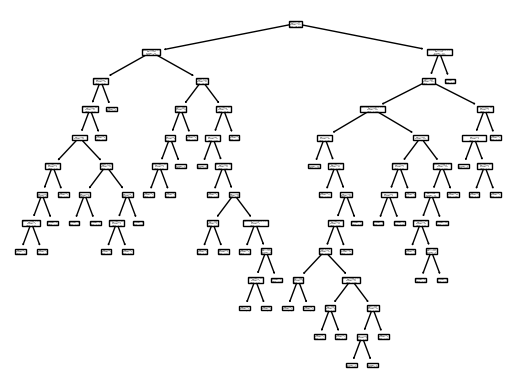

In [100]:
from sklearn import tree
tree.plot_tree(treeClassifier,feature_names=sliced_x.columns)

In [102]:
treeAccuracy = accuracy_score(treeResult,y_test)
treePrecision = precision_score(treeResult,y_test)
treeRecall = recall_score(treeResult,y_test)
treeF1 = recall_score(treeResult,y_test)
print(f"Accuracy: {treeAccuracy}")
print(f"Precision: {treePrecision}")
print(f"Recall: {treeRecall}")
print(f"F1: {treeF1}")

Accuracy: 0.8461538461538461
Precision: 0.9120879120879121
Recall: 0.8924731182795699
F1: 0.8924731182795699


<BarContainer object of 4 artists>

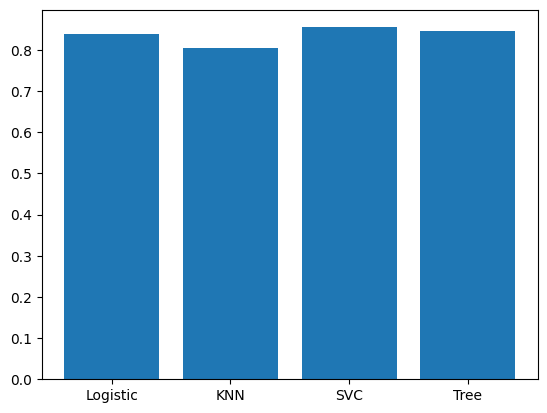

In [105]:
accuracyList = [logisticAccuracy,knnAccuracy,svcAccuracy,treeAccuracy]
accuracyString = ['Logistic','KNN','SVC','Tree']
import matplotlib.pyplot as plt
plt.bar(accuracyString,accuracyList)